# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection and preprocessing

In [2]:
#Loading the Dataset
car_dataset = pd.read_csv('car data.csv')
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [4]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print("-----------------------------")
print(car_dataset.Seller_Type.value_counts())
print("-----------------------------")
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
-----------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
-----------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encoding the Categorical Data

In [7]:
# encoding "fuel" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "seller_type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [8]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


# Splitting the dataset

In [9]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

# Splitting the data into : Train(80%)  & Test(20%)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Training the Model

In [11]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [12]:
# traing the model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

### Saving the Trained Model

In [13]:
import pickle
filename = 'CarPricePrediction_LinearRegression.train'
pickle.dump(lin_reg_model, open(filename,'wb'))
#loadMODEL = pickle.load(open('CarPricePrediction_LinearRegression.train','rb')) #loading the saved model

# Model Evaluation

In [14]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
training_data_prediction

array([ 6.78487861e+00,  1.03052148e+00,  4.33053370e+00,  2.19376150e-02,
        3.57946207e+00,  2.79503372e+00,  1.43719894e+00,  4.14889545e-01,
        1.61166418e+00,  1.12839641e+00,  4.32086309e+00,  6.17477452e+00,
        9.29097627e-01,  7.35592155e-01,  6.15378778e+00,  3.42694561e+00,
        2.32984882e+00,  7.50014006e+00,  4.61811711e+00,  4.43437311e+00,
        4.45915634e+00,  2.73352428e+00,  4.44377264e+00,  1.71378422e+00,
        2.49318608e-01,  3.94331375e+00,  1.37445456e+00,  4.61754769e+00,
        1.38595068e+00,  7.35605367e+00,  7.24473016e+00,  6.54331682e+00,
        2.29055849e+00,  2.19058216e+01,  2.19873970e+00,  5.64492151e+00,
        2.82714047e+00,  7.68311323e+00,  5.67039850e+00,  1.00273475e+01,
        1.99828812e+00,  2.37716894e+00,  1.22731322e+00,  2.40303328e+00,
        9.94390646e+00,  2.01662591e+00, -6.42391420e-01,  5.42943934e+00,
        1.14107420e+01, -5.10458803e-03,  1.09479248e+00,  1.61329534e+00,
        5.38687939e+00,  

In [15]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)
test_data_prediction

array([10.39222503,  0.71269634,  4.26367425,  4.89542882,  9.84484784,
        4.22631808,  7.1173891 ,  7.37327394,  0.1592961 ,  5.16712598,
        6.20624893,  6.17414198,  2.11880837,  7.74045843,  1.92235986,
        1.71406658,  2.02899942,  1.8536463 ,  9.35171759,  4.2546458 ,
        1.48996098,  9.14496453,  1.45846216,  9.63402658,  0.82165042,
        8.07898502,  1.53763892, -3.19873666,  4.22373915,  2.09526116,
        3.42865389,  3.72427545,  5.58001877,  7.75879392, -1.91563192,
        6.80980082,  8.20694812,  5.81047156,  6.15629896,  6.27493028,
       16.02197751,  2.07455343,  1.04886513, -0.45830577,  6.82090538,
        6.78567581,  0.98725428,  6.83257783, 14.31925066,  3.01359825,
        8.04481951, -0.89441322,  8.99139759,  1.14814903,  2.1191082 ,
       -0.82919712,  0.68456956, 10.02743111, -0.46773344, -2.43254957,
       10.0831552 ])

In [16]:
# R squared Error 
error_score1 = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error (Train Data) : ", error_score1*100,'%')
error_score2 = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error (Test Data) : ", error_score2*100,'%')

R squared Error (Train Data) :  88.38169193709794 %
R squared Error (Test Data) :  84.01532365377683 %


# Visualizing the actual and predicted prices

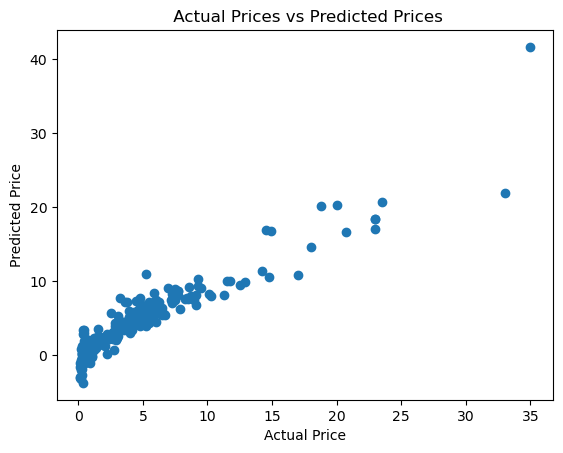

In [17]:
# on train data
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

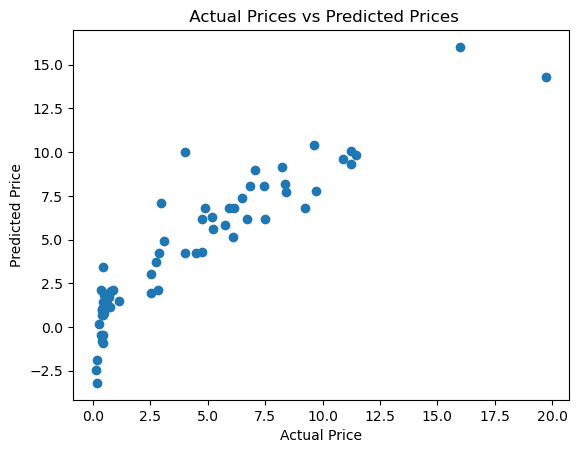

In [18]:
# on test data
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()